## Exploration Part

In [11]:
external_vars = [('track', 'genre_top'), ('track', 'license'), ('album', 'type')]

In [ ]:
features = pd.read_csv(os.path.join(data_path, "features.csv"), index_col=0, header=[0, 1, 2])
tracks = pd.read_csv(os.path.join(data_path, "tracks.csv"), index_col=0, header=[0, 1])
features.columns = features.columns.map('_'.join)
list(set(tracks.columns) - set(tracks._get_numeric_data().columns))

## Implementation Part

### Cluster the remaining columns, and explain what are is the best clustering method.
- silhouette_score
- elbow method
- k-fold cross validation on silhouette_score or Matual information with - kruskal wallis or anova

#### Dbscan

In [ ]:

def get_best_dbscan_params(clean_X: np.ndarray, min_samples: int):
    range_eps = np.linspace(0.1, 10, 20)
    scores = []
    for eps in range_eps:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        good_labels = model.fit_predict(clean_X)
        noisy_data_count = len(good_labels[good_labels == -1])
        if noisy_data_count > good_labels.shape[0] * 0.5 or len(np.unique(good_labels)) < 3:
            scores.append(0)
            continue
        print(f"noisy data count with eps={eps}: {noisy_data_count}")
        try:
            score = metrics.silhouette_score(clean_X, good_labels)
        except:
            score = 0
        scores.append(score)
    plt.plot(range_eps, scores)
    plt.show()
    return range_eps[np.argmax(scores)]


### Find anomalies in the data

In [17]:
import numpy as np
from keras import Model, Input
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch
from sklearn.manifold import TSNE, SpectralEmbedding, Isomap, MDS
from fcmeans import FCM
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import hdbscan
import scipy.cluster.hierarchy as sch

### using DBSCAN

[]

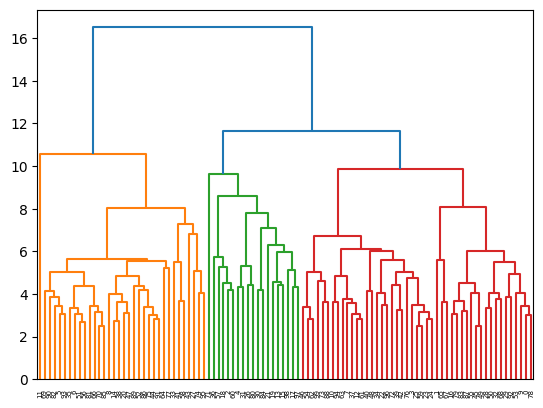

In [49]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(X[np.random.randint(X.shape[0], size=100), :], method='ward'))
plt.plot()

In [36]:
model = DBSCAN(eps=0.1**2*X.shape[1], min_samples=5, n_jobs=-1)
labels = model.fit_predict(X[np.random.randint(X.shape[0], size=1000), :])

In [37]:
labels[labels == -1].size / labels.size

0.013

In [68]:
labels = IsolationForest(random_state=0, n_jobs=-1, n_estimators=500, max_samples=256).fit_predict(X)

In [74]:
labels[labels == -1].size / labels.size

0.020066537522108987

In [25]:
labels = OneClassSVM(kernel="rbf", max_iter=1000, nu=.05, gamma='scale').fit_predict(X[np.random.randint(X.shape[0], size=1000), :])
labels[labels == -1].size / labels.size

0.051

### test whether anomalies are associated with any of the external variables

In [ ]:
    X, y = load_data()
    for anomaly_algo_name, anomaly_algo in tqdm(anomaly_detection_algorithms.items(), position=0, desc="anomaly", leave=False, colour='green', ncols=80):
        if anomaly_algo is None:
            continue
        scores = defaultdict(list)
        labels = anomaly_algo.fit_predict(X)
        for external_var_name in tqdm(external_vars, position=1, desc="external_var", leave=False, colour='blue', ncols=80):
            scores[external_var_name].append(
                mutual_info_score(
                    labels[labels == -1],
                    y[external_var_name].values[labels == -1]
                )
            )

        for external_var_name, external_var_scores in scores.items():
            print(f"{external_var_name}: {np.mean(external_var_scores)}")

### check if anomaly detection improves the clustering